In [1]:
from dataclasses import dataclass, field
from typing import List, Callable
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Define Contributors 
@dataclass
class Contributor:
    id: str
    contribution_history: List[float] = field(default_factory=list)

    def contribute(self, amount: float):
        self.contribution_history.append(amount)


In [3]:
# Test Contributors
bob = Contributor("Bob")
bob.contribute(100)
bob.contribute(11)
print(bob.contribution_history)

[100, 11]


In [4]:
# Define Landscape representing the state of world effected by contributions
@dataclass
class Landscape:
    status: float
    decay_rate: float

    def update(self, contributions: List[float]):
        # e.g. status increases by the sum of contributions
        self.status *=(1-self.decay_rate)
        self.status += sum(contributions)


In [5]:
# Test Landscape
land = Landscape(100, 0.1)
print(land.status)
land.update([100, 11, 5, 50])
print(land.status)

100
256.0


In [6]:
# Define Funder
@dataclass
class Funder:
    id: str
    past_funding: List[float] = field(default_factory=list)
    past_landscapes: List[Landscape] = field(default_factory=list)
    impact_belief: float = 0.5

    def observe(self, landscape: Landscape):
        # e.g. observe the landscape status
        self.past_landscapes.append(landscape)
    
    def update_belief(self, landscape: Landscape):
        # e.g. belief is updated based on the landscape status
        if len(self.past_funding) > 2 and len(self.past_landscapes) > 2:
            funding_array = np.array(self.past_funding)
            print(funding_array)
            landscape_array = np.array([l.status for l in self.past_landscapes])
            print(landscape_array)
            correlation = np.corrcoef(funding_array, landscape_array)[0, 1]
            print(f"Correlation: {correlation}")
            self.impact_belief = (correlation + 1) / 2  # Scale correlation (-1 to 1) to belief (0 to 1)
            if np.isnan(self.impact_belief):  # Check if impact belief is NaN
                self.impact_belief = 0  # Set to zero if NaN
        else:
            self.impact_belief = 0.9  # Default belief if insufficient data

    def fund(self, land: Landscape):
        # if belief is above a threshold, fund
        if self.impact_belief > 0.8:
            amount = 10            
        else:
            amount = 0
        
        self.past_funding.append(amount)
        self.observe(land)
        self.update_belief(land)
        return amount


[ 0 10 10]
[168.91724573 168.91724573 168.91724573]
Correlation: nan
[ 0 10 10  0]
[156.72296904 156.72296904 156.72296904 156.72296904]
Correlation: nan
[ 0 10 10  0  0]
[153.94560493 153.94560493 153.94560493 153.94560493 153.94560493]
Correlation: nan


/opt/anaconda3/envs/zpy/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/zpy/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Figure size 1000x500 with 0 Axes>

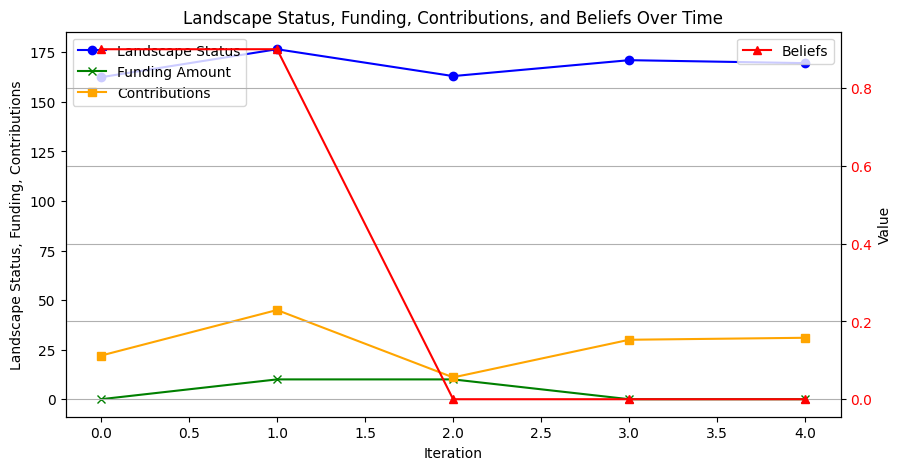

In [9]:
# Add contributions
contributions = [[20, 2], [10,10,25], [1,10], [30], [10, 10, 11]]  # Example contributions

# Test Funder
funder = Funder("CityCouncil")
statuses = []
fundings = []
beliefs = []
contribution_history = []

for i in range(5):  # Run for 5 iterations
    fund_amount = funder.fund(land)
    land.update(contributions[i])
    statuses.append(land.status)
    fundings.append(fund_amount)
    land.update([fund_amount])
    beliefs.append(funder.impact_belief)
    contribution_history.append(np.sum(contributions[i]))
    
# Visualization
plt.figure(figsize=(10, 5))

# Plot landscape statuses, funding amounts, and contributions on the primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel("Iteration")
ax1.set_ylabel("Landscape Status, Funding, Contributions")
ax1.plot(statuses, label="Landscape Status", marker='o', color='blue')
ax1.plot(fundings, label="Funding Amount", marker='x', color='green')
ax1.plot(contribution_history, label="Contributions", marker='s', color='orange')
ax1.tick_params(axis='y')
ax1.legend(loc="upper left")

# Create a second y-axis for beliefs
ax2 = ax1.twinx()
ax2.set_ylabel("Beliefs")
ax2.plot(beliefs, label="Beliefs", marker='^', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc="upper right")

plt.title("Landscape Status, Funding, Contributions, and Beliefs Over Time")
plt.grid(True)

plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()
